In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
import sys

In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams['figure.figsize'] = (20,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 20}
plt.rc('font', **font)

In [11]:
result = pd.read_csv('./important_csvs/predictions_confidences_csvs/resnet3d-16frames.csv')

In [12]:
result

,exp,bur,fj,ande,fs,label,exp_conf,bur_conf,fj_conf,ande_conf,fs_conf,exp_pred,bur_pred,fj_pred,ande_pred,fs_pred
0,0.0,1.0,0.0,0.0,0.0,bur,0.161617,0.839542,0.143174,0.057854,0.031431,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,fj,0.956148,0.043704,0.874554,0.159228,0.044267,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,fj,0.943624,0.056539,0.947541,0.065553,0.044336,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,anode,0.951940,0.048576,0.081831,0.768656,0.033381,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,bur,0.223271,0.778087,0.083378,0.129049,0.055210,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,1.0,0.0,1.0,0.0,0.0,fj,0.954246,0.045699,0.968744,0.058095,0.034090,1.0,0.0,1.0,0.0,0.0
816,1.0,0.0,0.0,1.0,0.0,anode,0.938070,0.062037,0.097686,0.839202,0.053377,1.0,0.0,0.0,1.0,0.0
817,1.0,0.0,1.0,0.0,0.0,fj,0.950029,0.049207,0.768348,0.226370,0.040396,1.0,0.0,1.0,0.0,0.0
818,1.0,0.0,0.0,0.0,1.0,fs,0.946177,0.054229,0.063404,0.099354,0.844652,1.0,0.0,0.0,0.0,1.0


In [13]:
sys.path.append('./helpers_models/')

In [14]:
from reliability_diagrams import *

In [15]:
df1 = result[['exp', 'exp_conf','exp_pred']]

In [16]:
df1

,exp,exp_conf,exp_pred
0,0.0,0.161617,0.0
1,1.0,0.956148,1.0
2,1.0,0.943624,1.0
3,1.0,0.951940,1.0
4,0.0,0.223271,0.0
...,...,...,...
815,1.0,0.954246,1.0
816,1.0,0.938070,1.0
817,1.0,0.950029,1.0
818,1.0,0.946177,1.0


In [46]:
y_true = result.exp.values
y_pred = result.exp_pred.values
y_conf = result.exp_conf.values

In [47]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

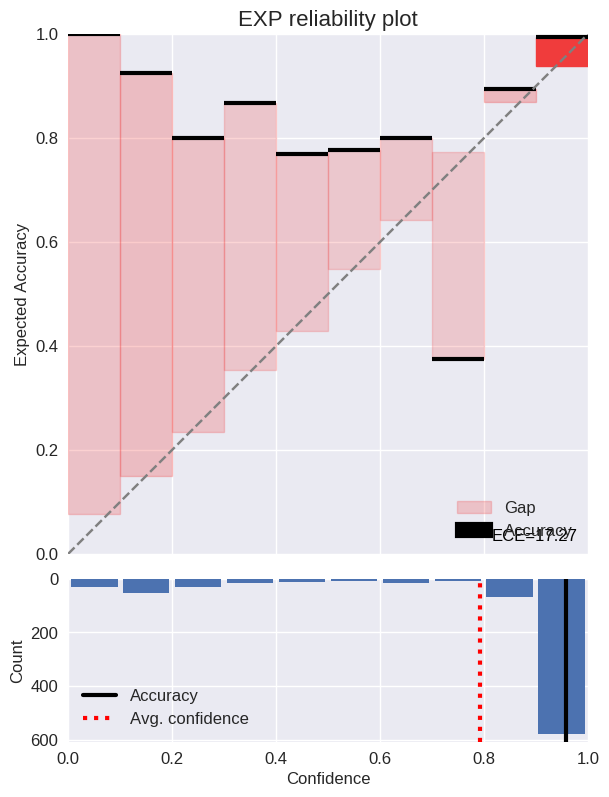

In [48]:
title = 'EXP reliability plot'

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

In [28]:
fig.savefig("figures/" + "_".join(plot_name.split()) + ".png", 
            format="png", dpi=144, bbox_inches="tight", pad_inches=0.2)

NameError: name 'plot_name' is not defined

# look at the bin data

In [22]:
bin_data = compute_calibration(y_true, y_pred, y_conf, num_bins=20)

In [23]:
bin_data

{'accuracies': array([1.        , 1.        , 0.88      , 0.96551724, 0.81818182,
        0.75      , 1.        , 0.75      , 0.72727273, 1.        ,
        0.8       , 0.75      , 0.875     , 0.71428571, 0.        ,
        0.5       , 0.66666667, 0.96078431, 0.99357602, 1.        ]),
 'confidences': array([0.03682242, 0.07818256, 0.12282052, 0.17443032, 0.22131561,
        0.27378316, 0.33275261, 0.37058664, 0.42177584, 0.47266787,
        0.52304415, 0.57906551, 0.61577932, 0.67381407, 0.71836307,
        0.79104999, 0.82386056, 0.88186326, 0.9336235 , 0.95721846]),
 'counts': array([  1,  30,  25,  29,  22,   8,   7,   8,  11,   2,   5,   4,   8,
          7,   2,   6,  15,  51, 467, 112]),
 'bins': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 'avg_accuracy': 0.9573170731707317,
 'avg_confidence': 0.7923784760597561,
 'expected_calibration_error': 0.17845307125731708,
 'max_calibrati

# anode

In [49]:
y_true = result.ande.values
y_pred = result.ande_pred.values
y_conf = result.ande_conf.values

In [50]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

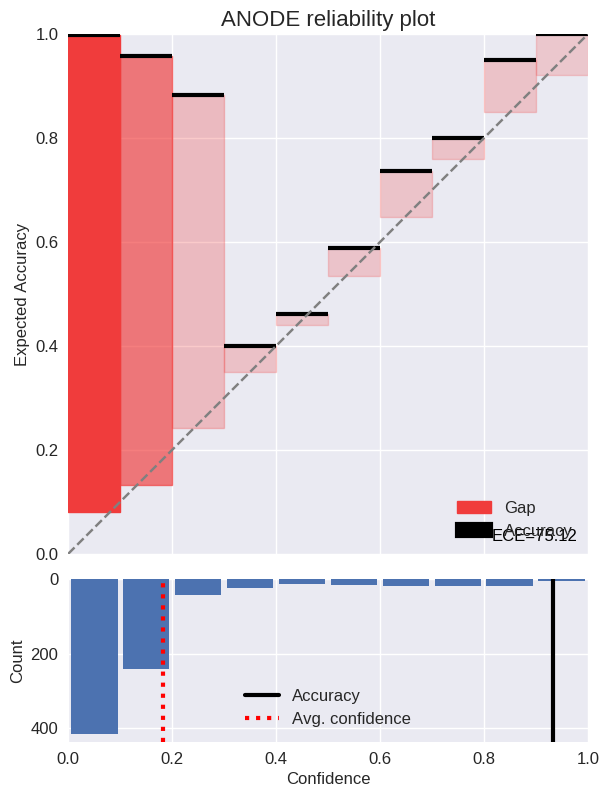

In [51]:
title = 'ANODE reliability plot'

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

# field_joint

In [52]:
y_true = result.fj.values
y_pred = result.fj_pred.values
y_conf = result.fj_conf.values

In [53]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

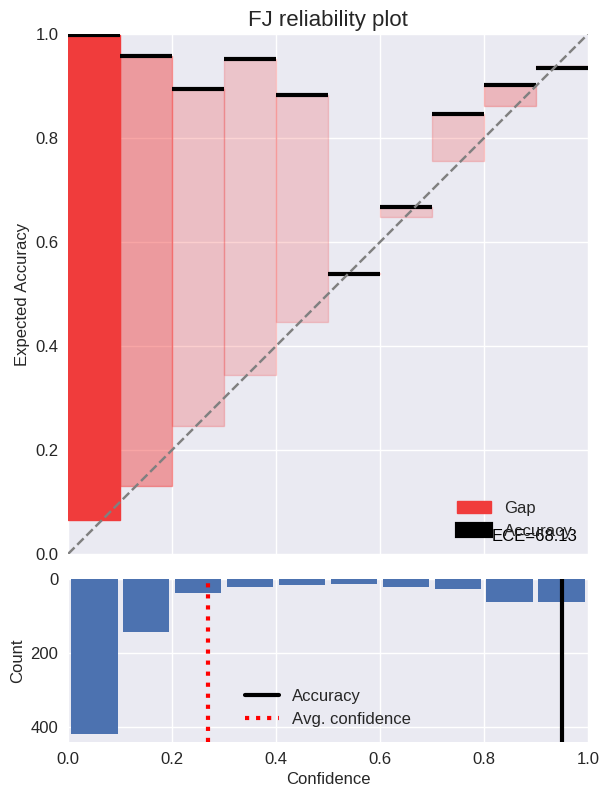

In [54]:
title = 'FJ reliability plot'

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

# free span

In [55]:
y_true = result.fs.values
y_pred = result.fs_pred.values
y_conf = result.fs_conf.values

In [56]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

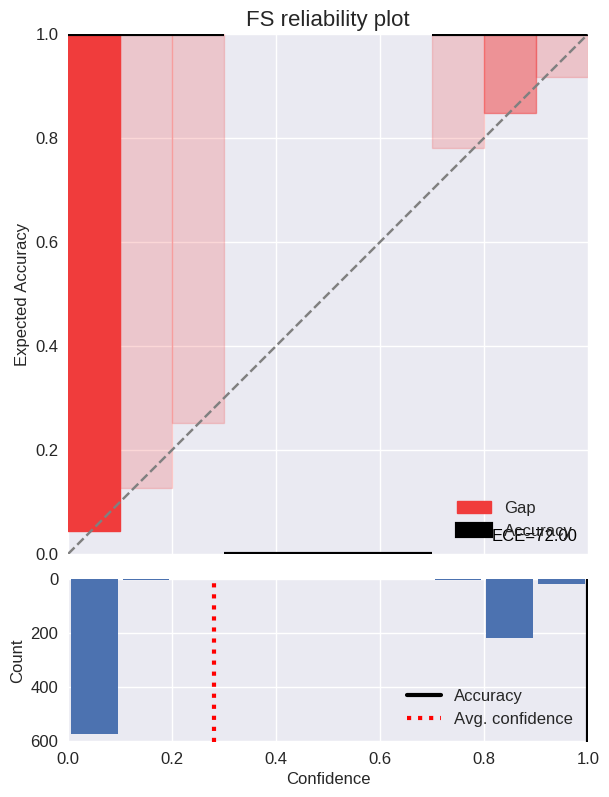

In [57]:
title = 'FS reliability plot'

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)

# burial

In [58]:
y_true = result.bur.values
y_pred = result.bur_pred.values
y_conf = result.bur_conf.values

In [59]:
# Override matplotlib default styling.
plt.style.use("seaborn")

plt.rc("font", size=12)
plt.rc("axes", labelsize=12)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

plt.rc("axes", titlesize=16)
plt.rc("figure", titlesize=16)

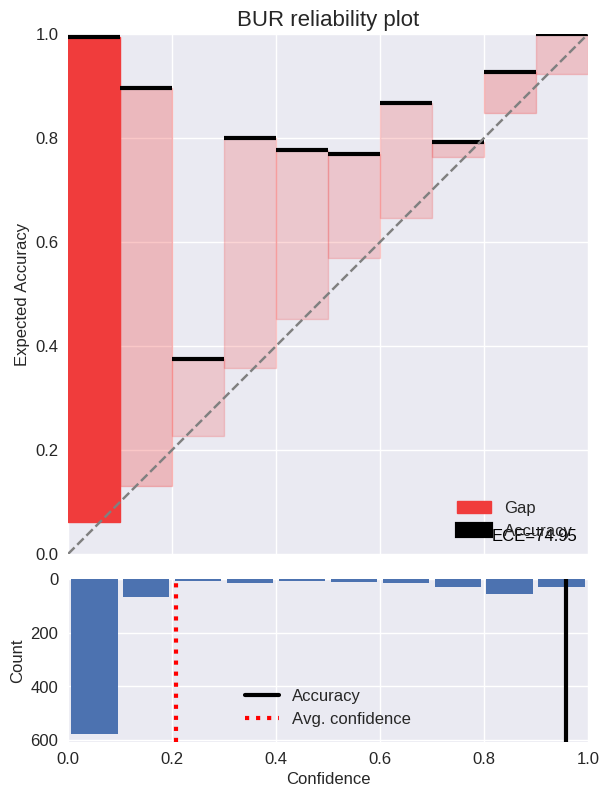

In [60]:
title = 'BUR reliability plot'

fig = reliability_diagram(y_true, y_pred, y_conf, num_bins=10, draw_ece=True,
                          draw_bin_importance="alpha", draw_averages=True,
                          title=title, figsize=(6, 6), dpi=100, 
                          return_fig=True)